In [1]:
# Notebook for calculating the 
# vibronic spectra
# This program fits potential energy surfaces
# and sets up the necessary DVR calculations
# Notebook is annotated where the DVR calculation must
# be executed before continuing 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import interpolate

In [3]:
import scipy

In [4]:
import pandas as pd

In [5]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 8)

In [6]:
from scipy.interpolate import interp1d

In [7]:
from dvr_setup_and_plotting_utils import *

72.09719999999999
potential written
dvr is set up


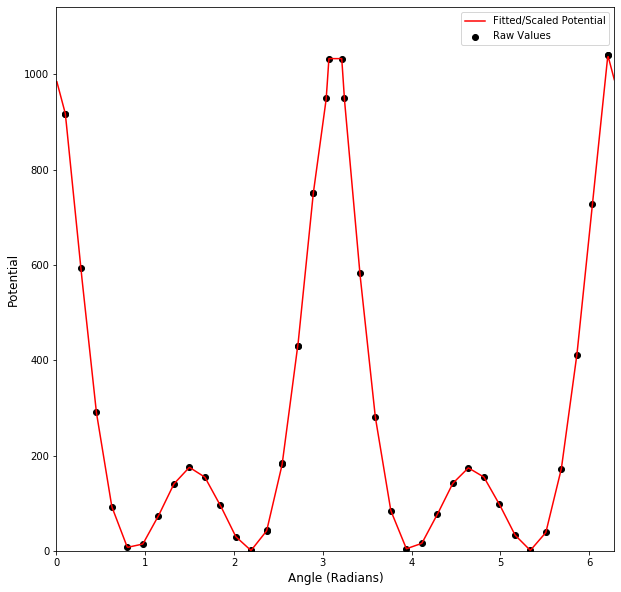

In [9]:
# Run and collect ground state information
# Reduced mass of freqency calculation =  4.0054 AMU

# Final fitted result worked best with the following fitted mass

mass_ground = 4.0054*1836*18
print(str(mass_ground/1836))

num_wavefunctions_ground = 5
grid_points = 500 # This number is N, number of points in DVR is 2N+1

# Linear fit used in production 
# Cubic fit also written 

fit_linear_potential_assume_periodic_write_to_file(raw_potential_filename='ground_state_scan_with_water_raw_pot_no_zpe.dat',num_grid_points=grid_points,
                                output_potential_filename='gs_scan_with_water_fitted.dat',shift_origin=0.0,scale_factor=1.00)


print('potential written')

setup_dvr(num_states=num_wavefunctions_ground,num_grid_points=grid_points,mass=mass_ground,
                         potential_energy_file_name='gs_scan_with_water_fitted.dat',
                        output_file_name='gs_scan_with_h2o')

print('dvr is set up')


In [9]:
# At this point in the directory where the files are made
# ! cp gs_scan_with_water_fitted.dat potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above
# User must supply their own matrix diagonalization subroutine


69.1272
potential written
dvr is set up


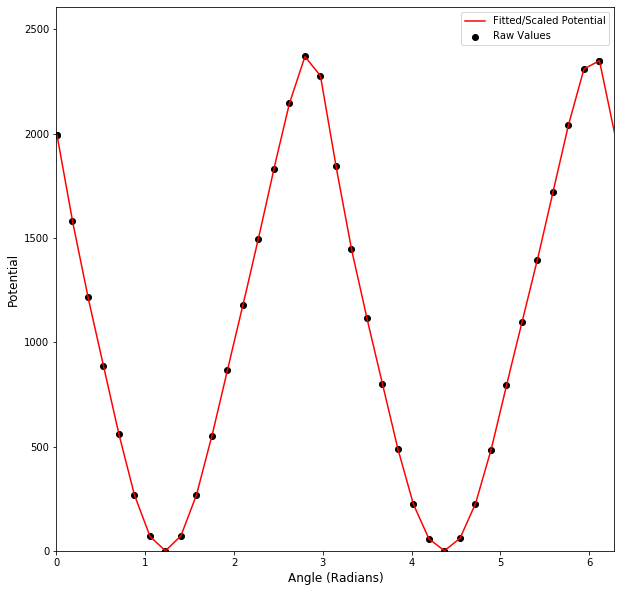

In [10]:
# Now setup and run the excited state excited state
# Reduced mass from excited state vibrational frequency calculation is 3.8404 

mass_excited =  3.8404*1836*18
num_wavefunctions_excited = 200
print(str(mass_excited/1836))

fit_linear_potential_assume_periodic_write_to_file(raw_potential_filename='excited_state_scan_with_water_raw_pot.dat',num_grid_points=grid_points,
                                output_potential_filename='es_scan_with_water_fitted.dat',shift_origin=0.0,scale_factor=1.0)

print('potential written')

setup_dvr(num_states=num_wavefunctions_excited,num_grid_points=grid_points,mass=mass_excited,
                         potential_energy_file_name='es_scan_with_water_fitted.dat',
                        output_file_name='es_scan_with_h2o')

print('dvr is set up')

In [11]:
# At this point in the directory where the files are made
# ! cp es_scan_with_water_fitted.dat potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above


In [12]:
# Absolute value of overlaps is calculated here

In [12]:
wavefunction_overlaps = read_wavefunctions_calculate_overlaps_vib_shift(
                                         ground_state_file_name_root='gs_scan_with_h2o',
                                         excited_state_file_name_root='es_scan_with_h2o',
                                         max_num_ground_state_wfs=4,
                                         max_num_excited_state_wfs=100,
                                         ground_state_max_energy=300,
                                         excited_state_max_energy=2000,
                                         vib_shift=195.0,
                                        vib_scale=1.0)

Calculating overlap for transition with energy 0.0
Calculating overlap for transition with energy 5.888978305218198
Calculating overlap for transition with energy 80.15266132876299
Calculating overlap for transition with energy 94.05814059671023
Calculating overlap for transition with energy 158.7772409450014
Calculating overlap for transition with energy 179.56434520945726
Calculating overlap for transition with energy 238.755885472509
Calculating overlap for transition with energy 267.0064211011248
Calculating overlap for transition with energy 314.0923816900813
Calculating overlap for transition with energy 347.3728342863558
Calculating overlap for transition with energy 393.442236611332
Calculating overlap for transition with energy 431.1144546878704
Calculating overlap for transition with energy 469.67453921555773
Calculating overlap for transition with energy 512.3262708525833
Calculating overlap for transition with energy 543.3935209815503
Calculating overlap for transition with

Calculating overlap for transition with energy 1722.1321668806195
Calculating overlap for transition with energy 1753.594771998735
Calculating overlap for transition with energy 1782.0053891266527
Calculating overlap for transition with energy 1810.7417474415977
Calculating overlap for transition with energy 1841.2322839645658
Calculating overlap for transition with energy 1867.4199286363807
Calculating overlap for transition with energy 1899.671643868924
Calculating overlap for transition with energy 1923.6704470886405


In [13]:
#This produces a list of dictionaries
# Showing example
wavefunction_overlaps[0]

{'energy': 0.0,
 'ground_state_id': 'gs_scan_with_h2o_0',
 'excited_state_id': 'es_scan_with_h2o_0',
 'overlap': 5.144000145705166e-13}

In [14]:
# Turn list of dictionaries into a dataframe
overlap_df = pd.DataFrame(wavefunction_overlaps)

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


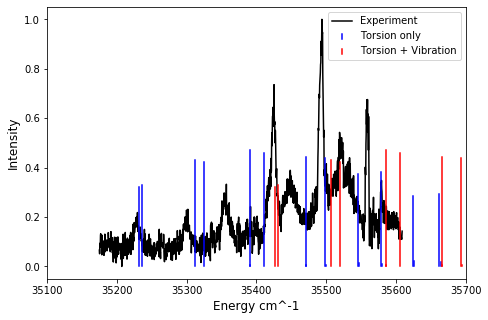

In [17]:
# Now, convert from a.u. to cm^-1, plot stem plot and compare to the experimental spectrum
# Use same color scheme as experimental section

# Exp files: PhPyH2O UV Spectrum.txt
# Exp file 2: PhPyH2O UV Spectrum.txt 

# Offset slightly different if ZPE effects included or not 

offset = 35233

kidwell_uv_spectrum_energy = np.loadtxt('PhPyH2O UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPyH2O UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 


ax.set_xlabel('Energy cm^-1', fontsize = 12)
ax.set_ylabel('Intensity', fontsize = 12)
ax.set_xlim(35100,35700)
 
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity,label='Experiment', color='k',ls='-')

# In principle can 
# scale the overlaps that involve the second vibrationale xcited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)



wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)



ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion only',
       basefmt=" ")


ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")

ax.legend()
plt.savefig('./theory_exp_spectrum_compare_mass_with_water_for_presentation.pdf')
plt.show()

In [18]:
# Plot now with linewidth
# Reads in a list of frequencies and intensities
# Then produces two text files that have the right spectrum
def calc_spectrum_plot(freq_list=None,int_list=None,
                       min_freq=0.0,max_freq=0.0,width=1,resolution=0.05):
    
    num_points = int((max_freq-min_freq)/(resolution))
    
    frequencies = list()
    intensities = list()
    
    for i in range(0,num_points):
        frequency = min_freq+i*resolution
        intensity = 0.0
        
        for j in range(0,len(freq_list)):
            peak_center = freq_list[j]
            peak_height = int_list[j]
           # print(peak_center)
           # print(peak_height)
            intensity = intensity + peak_height*np.exp(-(frequency - peak_center)**2/(2*width))
    
        frequencies.append(frequency)
        intensities.append(intensity)
    
    return frequencies,intensities


In [19]:
theory_frequencies,theory_intensities = calc_spectrum_plot(
                    freq_list=vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset,
                    int_list=vibrational_state_overlaps_df['overlap'],
                       min_freq=offset-50,max_freq=offset+1000,width=10.0,resolution=0.5)

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


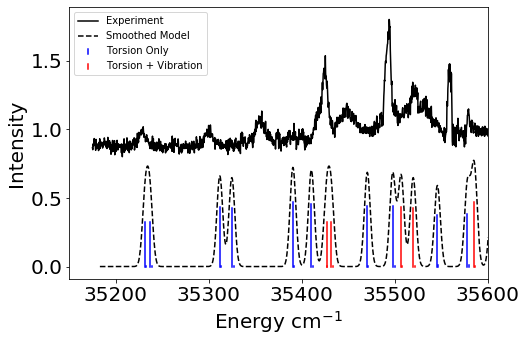

In [20]:
# Plot with both spectra on each other

# Set baseline to zero 

kidwell_uv_spectrum_energy = np.loadtxt('PhPyH2O UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPyH2O UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm$^{-1}$', fontsize = 20)
ax.set_ylabel('Intensity', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)


ax.set_xlim(35150,35600)

max_freq = 38000
 
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity+0.8,label='Experiment', color='k',ls='-')


theory_plot_intensities = theory_intensities/max(theory_intensities)

# Plot the theory spectrum
ax.plot(theory_frequencies, theory_plot_intensities,label='Smoothed Model', color='k',ls='dashed')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

# Might need to normalize

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)



ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")


ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


ax.legend()
plt.savefig('./theory_exp_spectrum_smooth_with_water_for_presentation.pdf',bbox_inches='tight')
plt.show()



In [21]:
# Generate plots of the wavefunctions
# or squares of the wavefunctions
ground_state_file_name_root='gs_scan_with_h2o'
excited_state_file_name_root='es_scan_with_h2o'
max_num_ground_state_wfs=4
max_num_excited_state_wfs=100


In [22]:
ground_state_dict = read_dvr_output(filename_root=ground_state_file_name_root,num_states=max_num_ground_state_wfs)
excited_state_dict = read_dvr_output(filename_root=excited_state_file_name_root,num_states=max_num_excited_state_wfs)


Examining state gs_scan_with_h2o_0


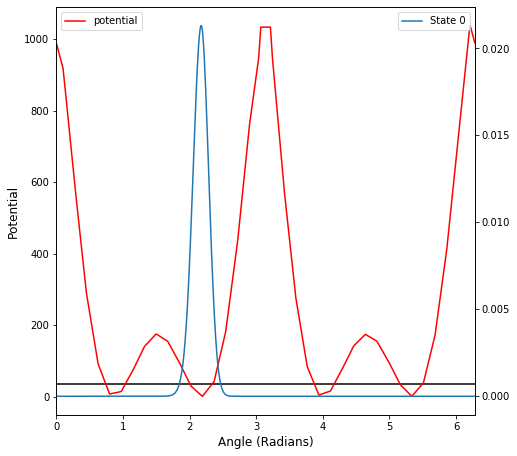

Examining state gs_scan_with_h2o_1


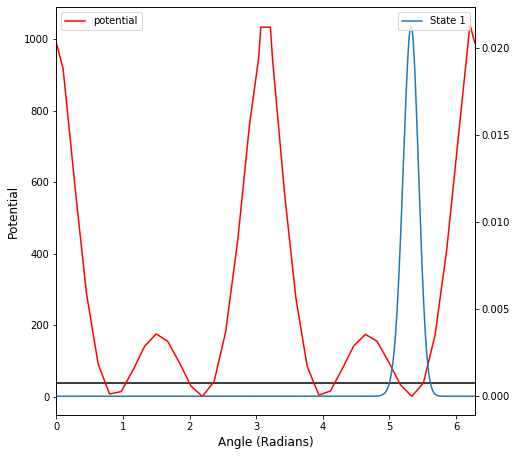

Examining state gs_scan_with_h2o_2


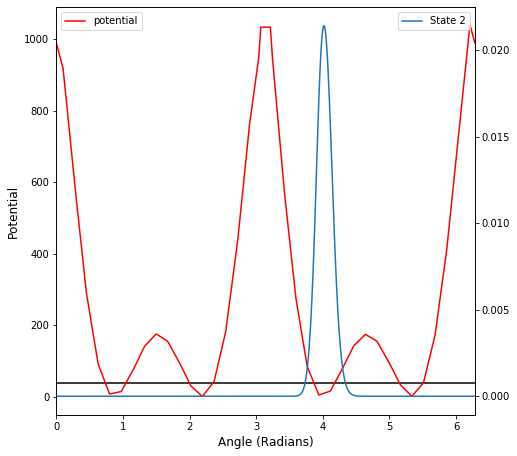

Examining state gs_scan_with_h2o_3


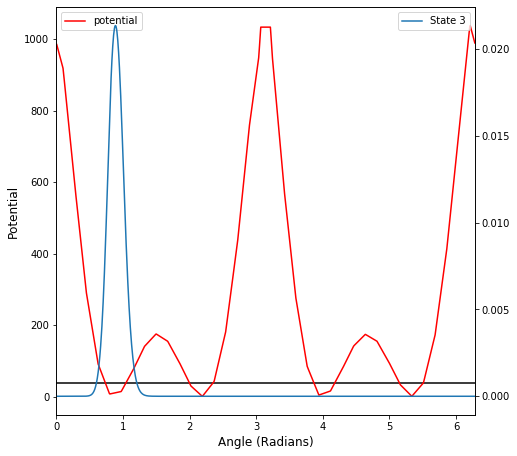

In [23]:
# plot the potential and square of the wavefunction 
# (avoids ambiguity on signs) of the ground state potential


wavefunction_counter = 0

max_wavefunctions = 4

prefix = "kidwell_gs_scan_with_h2o"

for i in range(0,4):
    plot_wavefunction_squared(state_dict=ground_state_dict,
                        state_num=i,prefix="gs_scan_with_h2o_",
                      plotting_potential_name="gs_scan_with_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground)

In [24]:
# Get maximum overlaps to plot those excited state wavefunctions
overlap_df.sort_values(by=['overlap'],ascending=False).head(20)

,energy,ground_state_id,excited_state_id,overlap
226,0.000718,gs_scan_with_h2o_2,es_scan_with_h2o_4,0.469980
227,0.001606,gs_scan_with_h2o_2_vib_excited,es_scan_with_h2o_4_vib_excited,0.469980
337,0.000808,gs_scan_with_h2o_3,es_scan_with_h2o_5,0.458860
338,0.001697,gs_scan_with_h2o_3_vib_excited,es_scan_with_h2o_5_vib_excited,0.458860
230,0.001082,gs_scan_with_h2o_2,es_scan_with_h2o_6,0.444037
231,0.001971,gs_scan_with_h2o_2_vib_excited,es_scan_with_h2o_6_vib_excited,0.444037
342,0.002095,gs_scan_with_h2o_3_vib_excited,es_scan_with_h2o_7_vib_excited,0.438766
341,0.001207,gs_scan_with_h2o_3,es_scan_with_h2o_7,0.438766
222,0.000360,gs_scan_with_h2o_2,es_scan_with_h2o_2,0.432221
223,0.001248,gs_scan_with_h2o_2_vib_excited,es_scan_with_h2o_2_vib_excited,0.432221


In [25]:
# Export overlap to csv file

overlap_df.to_csv('./phpy_h2o_overlap_list_no_zpe.csv')